In [16]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn import datasets

In [17]:
np.random.seed(0)

In [18]:
n_pts = 500
X, labels = datasets.make_circles(n_samples=n_pts, random_state= 123, noise= 0.12, factor= 0.2)



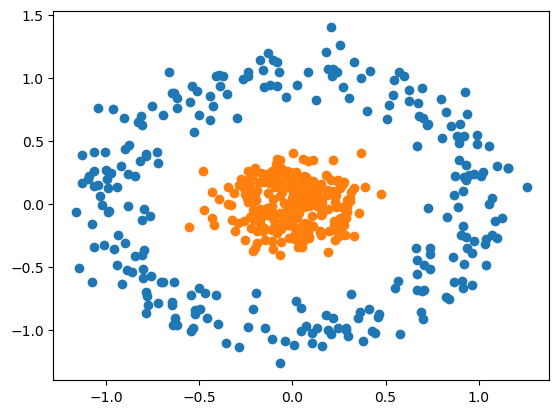

In [19]:
plt.scatter(X[labels==0, 0],X[labels==0, 1])
plt.scatter(X[labels==1, 0],X[labels==1, 1])

In [20]:
model = Sequential()
model.add(Dense(6, input_shape=(2,), activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.02), 'binary_crossentropy', metrics=['accuracy'])


c:\Users\3omd4\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
h = model.fit(x=X, y=labels, verbose=1,batch_size= 20, epochs=100, shuffle='True')

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4747 - loss: 0.6952
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5204 - loss: 0.6930 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4872 - loss: 0.6944 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4706 - loss: 0.6950 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5354 - loss: 0.6919 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5575 - loss: 0.6913
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6273 - loss: 0.6832 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7603 - loss: 0.6727 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - loss: 0.6579 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8094 - loss: 0.6179 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8705 - loss: 0.5774
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

Text(0.5, 1.0, 'accuracy')

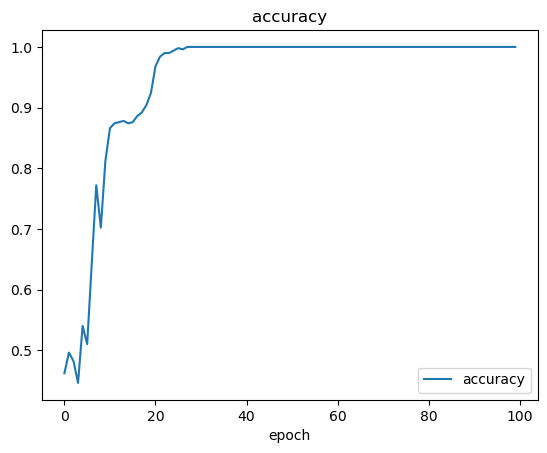

In [22]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')


Text(0.5, 1.0, 'loss')

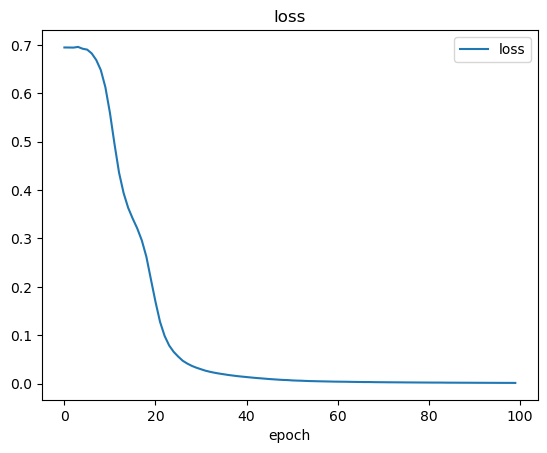

In [23]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')


In [24]:
def plot_decision_boundary(X, Y, model):
  x_span = np.linspace(min(X[:, 0]) - 0.025, max(X[:, 0]) + 0.025)
  y_span = np.linspace(min(X[:, 1]) - 0.025, max(X[:, 1]) + 0.025)


  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)#these pridictions predict the propability
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


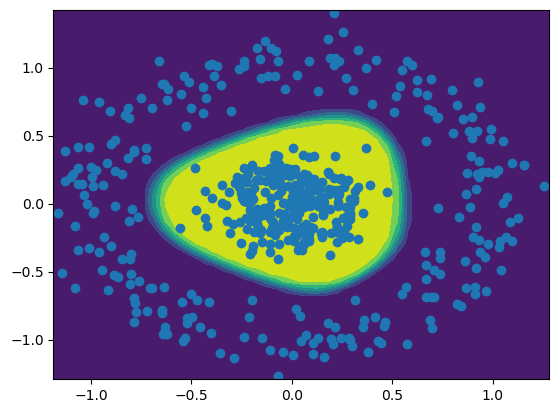

In [ ]:
plot_decision_boundary(X, labels, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
white prediction is:  [[0.01085727]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
red prediction is:  [[0.9961719]]


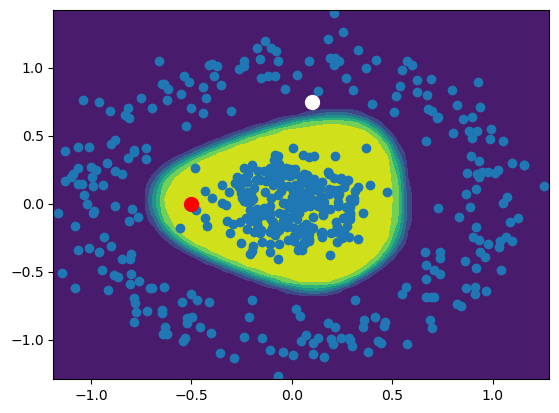

In [37]:
plot_decision_boundary(X, labels, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x= 0.1
y= 0.75
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='white')
print('white prediction is: ', prediction)
x= -0.5
y= 0.0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('red prediction is: ', prediction)